<a href="https://colab.research.google.com/github/arathi-suraj/exp-physics/blob/main/laser_modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

***TEM 00***

Text(0, 0.5, 'Amplitude (V)')

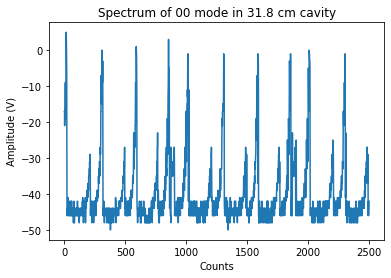

In [3]:
mode_00 = np.loadtxt("/content/drive/My Drive/laser modes/single_mode_data_new (00) 31.8 cavity")
#print(len(mode_00))
x_array = np.linspace(0, 2500, 2500)
plt.plot(x_array, mode_00)
plt.title("Spectrum of 00 mode in 31.8 cm cavity")
plt.xlabel("Counts")
plt.ylabel("Amplitude (V)")

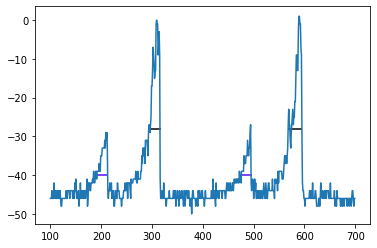

In [ ]:
plt.plot(x_array[100:700], mode_00[100:700])
#first widths
plt.hlines(-40, 190, 214, color="#5908FF")
plt.hlines(-28, 292, 318)

#second widths
plt.hlines(-40, 471, 496, color="#5908FF")
plt.hlines(-28, 568, 596)

# width_small_1 = 24 counts
# width_small_2 = 25 counts 

# width_large_1 = 26 counts 
# width_large_2 = 28 counts 

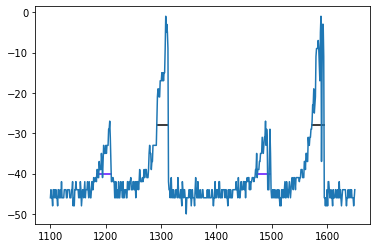

In [ ]:
plt.plot(x_array[1100:1650], mode_00[1100:1650])

#Third widths
plt.hlines(-40, 1182, 1212, color="#5908FF")
plt.hlines(-28, 1291, 1315)

#Fourth widths
plt.hlines(-40, 1469, 1499, color="#5908FF")
plt.hlines(-28, 1570, 1596)

# width_small_3 = 30 counts
# width_small_4 = 30 counts 

# width_large_3 = 24 counts 
# width_large_4 = 26 counts

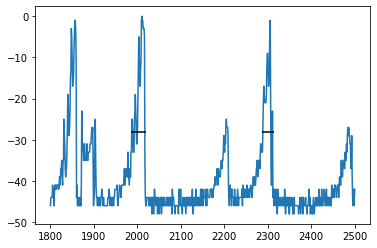

In [14]:
plt.plot(x_array[1800:2500], mode_00[1800:2500])
plt.hlines(-28, 1985, 2020, color="black")
plt.hlines(-28, 2286, 2315, color="black")

# width 5 = 35 counts
# width 6 = 29 counts

In [16]:
width_small_avg = (30+30+24+25)/4
width_large_avg = (24+26+26+28+35+29)/6
widths = np.array([24, 26, 26, 28, 35, 29])
stdev = np.std(widths)
print("Large width = %f counts, stdev = %f counts"%(width_large_avg, stdev))

Large width = 28.000000 counts, stdev = 3.511885


Using the width data, the average widths are:

How to deduce if these are reasonable???

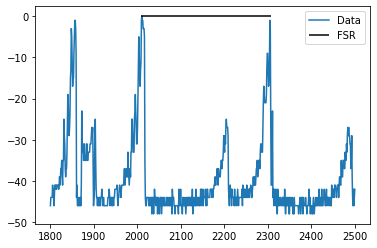

In [22]:
# We look at the dist b/w tallest peaks, this is the FSR
plt.plot(x_array[1800:2500], mode_00[1800:2500], label="Data")
plt.hlines(0, 2009, 2307, label="FSR", color="black")
plt.legend()
# 1 FSR = 2307 - 2009 counts = 298 counts
one_FSR2 = 298

Text(0.5, 1.0, 'Estimate of FSR from peak to peak (counts)')

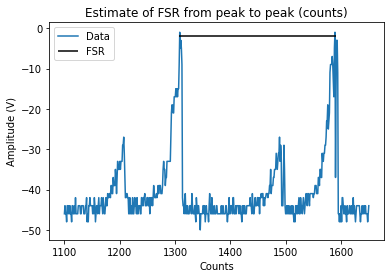

In [33]:
# We look at the dist b/w tallest peaks, this is the FSR
plt.plot(x_array[1100:1650], mode_00[1100:1650], label="Data")
plt.hlines(-2, 1307, 1590, label="FSR", color="black")
plt.legend()
plt.xlabel("Counts")
plt.ylabel("Amplitude (V)")
# 1 FSR = 1590 - 1307 counts = 283 counts
one_FSR = 283
plt.title("Estimate of FSR from peak to peak (counts)")

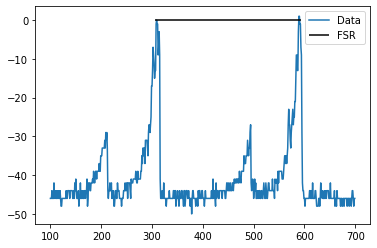

In [30]:
plt.plot(x_array[100:700], mode_00[100:700], label="Data")
plt.hlines(0, 306, 593, label="FSR", color="black")
plt.legend()

# FSR3 = 593-306 = 287 counts
plt.title

To convert to linewidth, see code blocks below.

In [35]:
def linewidth(counts):
  # we know dist b/w peaks is FSR. FSR = 1.5 GHz = 1.5e9 Hz
  one_FSR = (283+298+287)/3
  one_count = 1.5e9/(one_FSR)
  return(counts*one_count)
print(linewidth(1))

5184331.797235023


In [32]:
fsr = np.array([283, 298, 287])
print(np.std(fsr))

6.342099196813483


In [37]:
lnwdth = linewidth(28)
print(lnwdth)
error = lnwdth*math.sqrt((3.51/28)**2 +(0.022/5.18e6)**2)
print(error)

145161290.32258064
18197004.60829494


The observed linewidth for the 00 mode is 145.1 MHz. Converting to nm below using
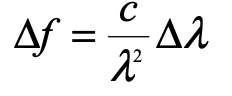

In [39]:
c = 3e8

# We know the center frequency is 632.8 nm
center = 632.8e-9

dlt_lambda = (lnwdth*(center**2))/c
print(dlt_lambda)
print((18*(center**2))/c)

1.9375927741935484e-13
2.4026150399999998e-20


Therefore, we get a linewidth of 0.193 pm, or 0.000193 nm for the 00 mode

Now onto transverse and longitudinal modes

In [41]:
L1 = 0.318
L2 = 0.273
R = 0.45
zr_1 = 0.5*math.sqrt(L1*(2*R-L1))
zr_2 = 0.5*math.sqrt(L2*(2*R-L2))

dlt_long_1 = c/(2*L1)
dlt_long_2 = c/(2*L2)

dlt_trans_1 = (c/(math.pi*L1)) * math.atan((L1/(2*zr_1)))
dlt_trans_2 = (c/(math.pi*L2)) * math.atan((L2/(2*zr_2)))

print(dlt_long_1, dlt_long_2, dlt_trans_1, dlt_trans_2)

471698113.2075472 549450549.4505494 191148785.06225917 204022989.01440176


0.0
440668202.764977
percent diff = 6.578341


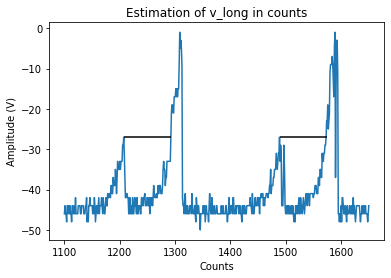

In [46]:
plt.plot(x_array[1100:1650], mode_00[1100:1650], label="Data")
plt.hlines(-27, 1208, 1293, color="black")
plt.hlines(-27, 1490, 1575, color="black")
plt.title("Estimation of v_long in counts")
plt.xlabel("Counts")
plt.ylabel("Amplitude (V)")
dlt = np.array([85, 85])
print(np.std(dlt))
# avg delta count
avg_dlt = 85 # counts
# Convert to freq
one_FSR = (283+298+287)/3
one_count = 1.5e9/(one_FSR)
avg_freq = 85*one_count
print(avg_freq)
print("percent diff = %f" % ((dlt_long_1 - avg_freq)*100/dlt_long_1))

This spacing seems most similar to a longitudinal mode!

I continue this for the other data sets

***TEM 22***

Text(0.5, 1.0, 'TEM 10 mode spectrum for cavity length = 27.3 cm')

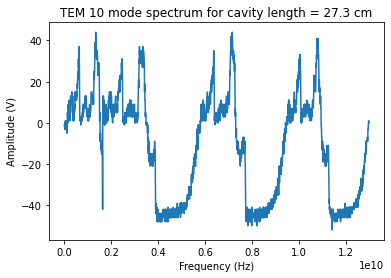

In [51]:
mode_33 = np.loadtxt("/content/drive/My Drive/laser modes/single_mode_data (10) 27.3 cm cavity")
x_array_33 = np.linspace(0, len(mode_33), len(mode_33))
one_count = 1.5e9/(one_FSR)
freq_array = np.multiply(x_array_33, one_count)
plt.plot(freq_array, mode_33)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (V)")
plt.title("TEM 10 mode spectrum for cavity length = 27.3 cm")

In [ ]:
# we estimate a FWHM of 1560-1300 = 260 counts
# using the same conversion from counts to Hz as in the 00 case

lnwdth22 = linewidth(260)
# Into nm
c = 3e8
center = 632.8e-9

dlt_lambda22 = (lnwdth22*(center**2))/c
print(dlt_lambda22)

1.839457922261484e-12


Linewidth of 1.84 pm or 0.00184 nm